**RNN LSTM MODEL - AQI Forecasting**

*The RNN LSTM model for Air Quality Index (AQI) forecasting is a machine learning approach that uses historical air quality data to predict future air quality levels. Recurrent neural networks (RNN) and Long Short-Term Memory (LSTM) models are used to analyze the complex temporal relationships within the data and make accurate predictions. This method has practical applications in pollution control and public health, allowing decision-makers to take proactive steps to reduce air pollution and its harmful effects on the environment and human health.*

In [41]:
#Importing the required libraries

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
from IPython.display import HTML,display

warnings.filterwarnings("ignore")

In [42]:
#Read the daily city-wise data
df= pd.read_csv("./air-quality-dataset/city_day.csv",parse_dates=True)
df['Date'] = pd.to_datetime(df['Date'])

In [43]:
#Keeping only the columns needed
df=df[['City','Date','AQI']]

In [44]:
delhi = df[df['City'] == 'Delhi']
delhi.drop(['City'],axis=1,inplace = True)
delhi.set_index('Date', inplace = True)


In [45]:
delhi

,AQI
Date,
2015-01-01,472.0
2015-01-02,454.0
2015-01-03,143.0
2015-01-04,319.0
2015-01-05,325.0
...,...
2020-06-27,112.0
2020-06-28,196.0
2020-06-29,233.0


In [46]:
#Fill NULL DATA
delhi['AQI'].fillna(method = 'bfill',inplace = True)

In [47]:
#Taking monthly average
delhi=delhi.astype('float64')
delhi=delhi.resample(rule='MS').mean()

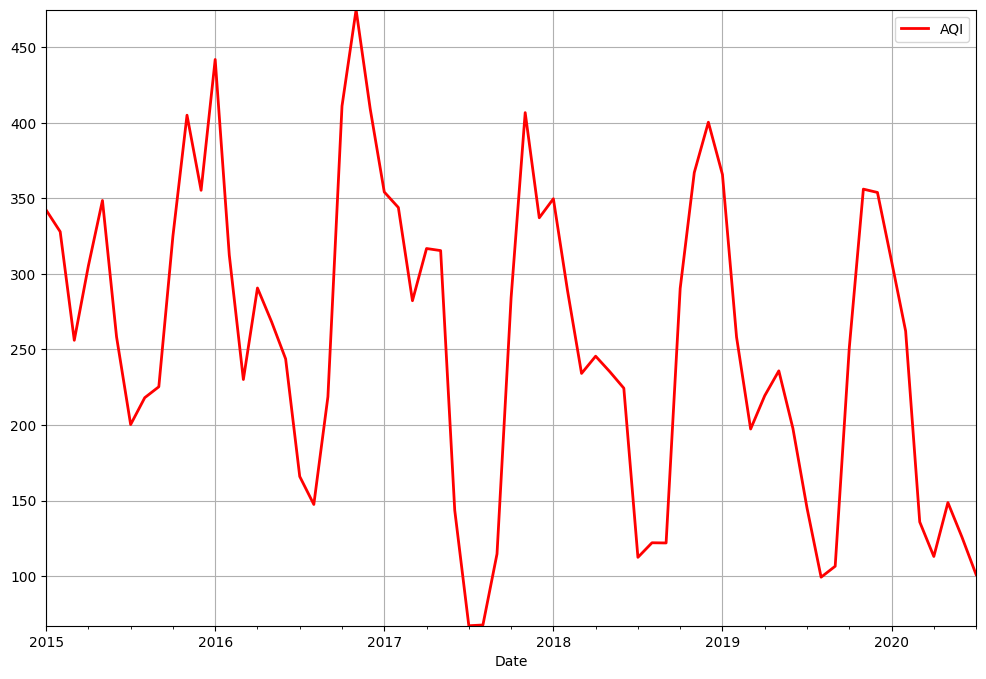

In [48]:
ax=delhi[['AQI']].plot(figsize=(12,8),grid=True,lw=2,color='Red')
ax.autoscale(enable=True, axis='both', tight=True)

# FORECASTING


In [49]:
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error

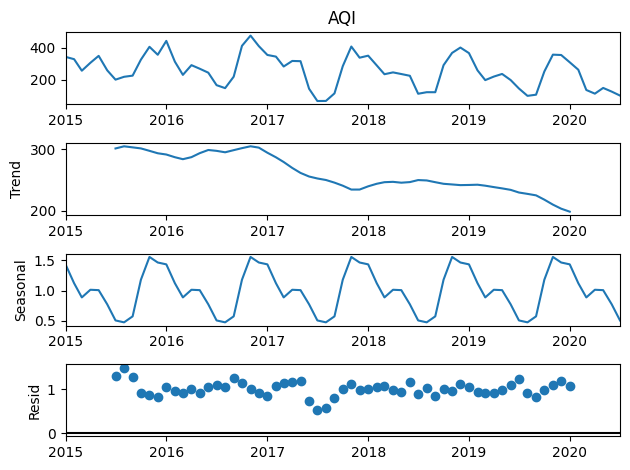

In [50]:
delhi_AQI=delhi['AQI']
result=seasonal_decompose(delhi_AQI,model='multiplicative')
result.plot();

# RNN-LSTM MODEL


In [51]:
#Splitting the training and testing data

train=delhi[:48]
test=delhi[48:61]

In [52]:
type(train)

pandas.core.frame.DataFrame

In [53]:
#print("Shape of train data:" + str(train.array.shape))
#print("Shape of test data:" + str(test.array.shape))

print("Shape of train data:" + str(train.shape))
print("Shape of test data:" + str(test.shape))

Shape of train data:(48, 1)
Shape of test data:(13, 1)


In [54]:
#train_arr=np.expand_dims(train, axis=1)
#test_arr=np.expand_dims(test, axis=1)

train_arr = train
test_arr = test

In [55]:
train_arr

,AQI
Date,
2015-01-01,342.290323
2015-02-01,327.928571
2015-03-01,256.064516
2015-04-01,305.266667
2015-05-01,348.580645
2015-06-01,258.333333
2015-07-01,200.290323
2015-08-01,218.064516
2015-09-01,225.300000


In [56]:
#Preprocessing the dataset

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(train_arr)

MinMaxScaler()

In [57]:
scaled_train = scaler.transform(train_arr)
scaled_test = scaler.transform(test_arr)

In [58]:
#Defining our time series generator that would be used to parse data into the model

from keras.preprocessing.sequence import TimeseriesGenerator
n_input = 12
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [59]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.67487834 0.63964965 0.46337057 0.58406109 0.6903082  0.46893587
 0.32655914 0.37015839 0.38790668 0.63246601 0.82878394 0.70684585]
Predict this y: 
 [[0.91922402]]


In [60]:
#Importing the necessary components to define our model

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.optimizers import Adam

In [61]:
# defining the stacked LSTM model
model = Sequential(name = 'LSTM-Model')
model.add(LSTM(32, activation='relu', return_sequences = True, input_shape=(n_input, n_features),name = "LSTM_1"))
#model.add(LSTM(100, activation='relu', return_sequences = True,name = "LSTM_2"))
#model.add(Dropout(0.2))
model.add(LSTM(32, activation='relu',name = "LSTM_2"))
#model.add(Dropout(0.2))
#model.add(Dense(8))
model.add(Dense(1,name = "DENSE_1"))
model.compile(optimizer= 'adam',  loss='mse')

model.summary()

Model: "LSTM-Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 LSTM_1 (LSTM)               (None, 12, 32)            4352      
                                                                 
 LSTM_2 (LSTM)               (None, 32)                8320      
                                                                 
 DENSE_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 12,705
Trainable params: 12,705
Non-trainable params: 0
_________________________________________________________________


In [62]:
#Plotting the layer structure
from keras.utils import plot_model
plot_model(model,show_shapes=True,show_layer_names=True,rankdir="TB",dpi=96)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [63]:
#Fitting our model
model.fit_generator(generator,epochs=200)

Epoch 1/200
36/36 [==============================] - 4s 9ms/step - loss: 0.2081
Epoch 2/200
36/36 [==============================] - 0s 12ms/step - loss: 0.0904
Epoch 3/200
36/36 [==============================] - 1s 17ms/step - loss: 0.0782
Epoch 4/200
36/36 [==============================] - 1s 16ms/step - loss: 0.0755
Epoch 5/200
36/36 [==============================] - 1s 15ms/step - loss: 0.0749
Epoch 6/200
36/36 [==============================] - 0s 13ms/step - loss: 0.0728
Epoch 7/200
36/36 [==============================] - 0s 10ms/step - loss: 0.0692
Epoch 8/200
36/36 [==============================] - 0s 9ms/step - loss: 0.0658
Epoch 9/200
36/36 [==============================] - 0s 11ms/step - loss: 0.0716
Epoch 10/200
36/36 [==============================] - 0s 9ms/step - loss: 0.0600
Epoch 11/200
36/36 [==============================] - 0s 11ms/step - loss: 0.0751
Epoch 12/200
36/36 [==============================] - 0s 10ms/step - loss: 0.0582
Epoch 13/200
36/36 [========

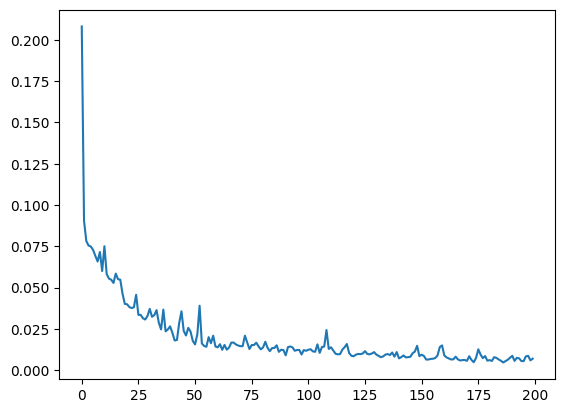

In [64]:
#plotting the loss vs #of epoch 
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [65]:
#Predicting using our model on the testing dataset
test_predictions = []

first_batch = scaled_train[-n_input:]
current_batch = first_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
      
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred) 
    
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 24ms/step


In [66]:
test_predictions = scaler.inverse_transform(test_predictions)

In [67]:
print(test_predictions.shape)
print(test_arr.shape)

(13, 1)
(13, 1)


In [68]:
test_arr['Predictions'] = test_predictions

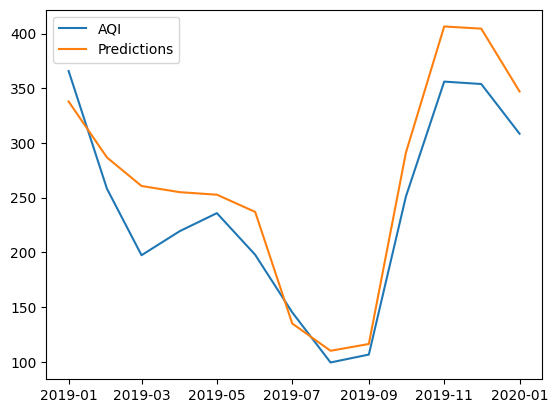

In [69]:
#Plotting the true values vs predicted values on testing dataset
plt.plot(test_arr['AQI'],label = 'AQI')
plt.plot(test_arr['Predictions'],label = 'Predictions')

plt.legend()

In [70]:
#Calculating the root mean squared error on the testing dataset
RMSE_test=np.sqrt(mean_squared_error(test_arr['AQI'],test_arr['Predictions']))
print('RMSE on the testing dataset = ',RMSE_test)
print('India_AQI=',test_arr['AQI'].mean())

RMSE on the testing dataset =  36.382118631943385
India_AQI= 238.0504608294931


In [71]:
#Predicting using our model on the training dataset
train_predictions = []

first_eval_batch = scaled_train[:n_input]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(train-n_input)):
      
    current_pred = model.predict(current_batch)[0]
    train_predictions.append(current_pred) 
    
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 34ms/step


In [72]:
train_predictions = scaler.inverse_transform(train_predictions)

In [73]:
print(train_predictions.shape)
print(train_arr.shape)

(48, 1)
(48, 1)


In [74]:
train_arr['Predictions'] = train_predictions

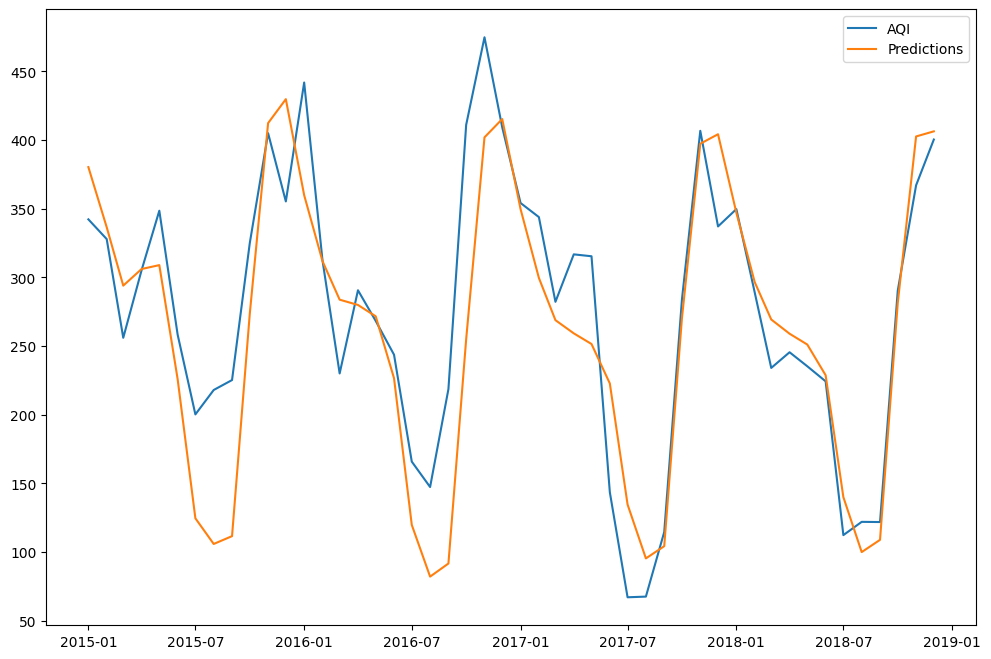

In [75]:
#Plotting the true values vs predicted values on training dataset
plt.figure(figsize=(12,8))
plt.plot(train_arr['AQI'],label = 'AQI')
plt.plot(train_arr['Predictions'],label = 'Predictions')
plt.legend()

**FURTHER IMPLEMENTATION**

In [76]:
#Calculating the root mean squared error on the testing dataset
RMSE_train =np.sqrt(mean_squared_error(train_arr['AQI'],train_arr['Predictions']))
print('RMSE on the training dataset = ',RMSE_train)
print('India_AQI=',train_arr['AQI'].mean())

RMSE on the training dataset =  53.59241797799235
India_AQI= 275.1711046334552


In [77]:
delhi_arr= delhi
scaled_delhi = scaler.transform(delhi_arr)

In [78]:
delhi_arr

,AQI
Date,
2015-01-01,342.290323
2015-02-01,327.928571
2015-03-01,256.064516
2015-04-01,305.266667
2015-05-01,348.580645
...,...
2020-03-01,135.838710
2020-04-01,113.000000
2020-05-01,148.645161


In [79]:
#Making the future predictions using our model
fut_predictions = []

first_eval_batch = scaled_delhi[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(12):
    
    current_pred = model.predict(current_batch)[0]
    
    
    fut_predictions.append(current_pred) 
    
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 25ms/step


In [80]:
fut_predictions = scaler.inverse_transform(fut_predictions)

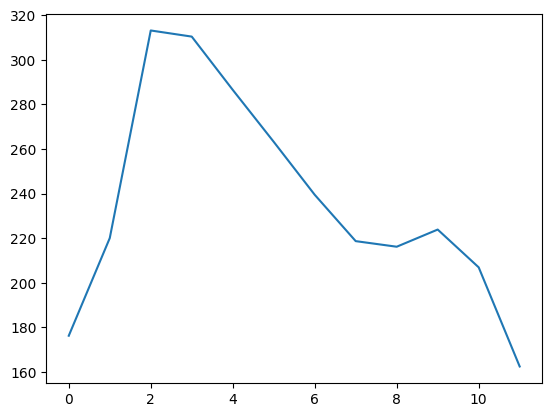

In [81]:
plt.plot(fut_predictions)

In [82]:
complete_pred = np.concatenate((delhi_arr,fut_predictions))

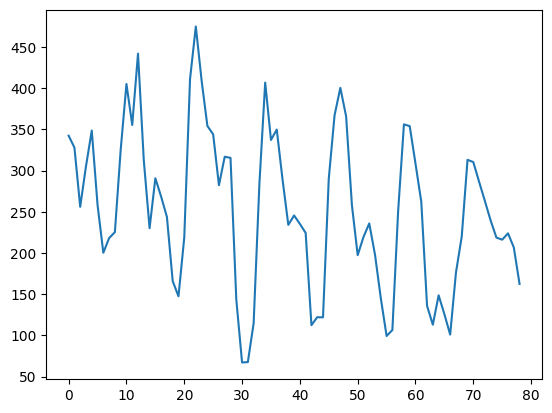

In [83]:
plt.plot(complete_pred)